#Experimentation using RNN
Notebook with the experimentation for the Time Series Forecasting Using Artificial Neural Networks paper to presented in IGPL 2022



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
path = '/content/drive/My Drive/Research Papers/IGPL 2022/'
directory = path + 'src/'
sys.path.append(directory)

In [3]:
import numpy as np
import pandas as pd
from ann import training, model_LSTM_1, model_GRU_1, model_LSTM_2, model_RNN_1
from ann_mlp import model_MLP_1
from utils import preprocessing, plotting, metrics

In [4]:
np.random.seed(0)

data_original = pd.read_csv(path+'data/IBEX35.csv')
data = data_original.drop(columns="Date")
data_norma = preprocessing.norma(data, True)

X, y = preprocessing.get_steps(data_norma['Close'], data_norma['Volume'])
X_train, X_test, y_train, y_test = preprocessing.splitting(X,y, 2482)

TypeError: ignored

In [ ]:
X_train_tensors, X_test_tensors, y_train_tensors, y_test_tensors = training.convert_tensor(X_train,X_test,y_train,y_test)
X_train_tensors_final = training.reshape_3d(X_train_tensors, X_train_tensors.shape[0], 1, X_train_tensors.shape[1])
X_test_tensors_final = training.reshape_3d(X_test_tensors, X_test_tensors.shape[0], 1, X_test_tensors.shape[1]) 

In [ ]:
num_epochs = 1000
learning_rate = 0.001 

In [ ]:
input_size = 8
hidden_n = 2
n_layers = 1
n_class = 1
dropout_prob = 0.2
silent_mode = True

In [ ]:
lstm1 = model_LSTM_1(input_size, n_class, hidden_n, n_layers, dropout_prob)
gru1 = model_GRU_1(input_size, n_class, hidden_n, n_layers, dropout_prob)
lstm2 = model_LSTM_2(input_size, n_class, hidden_n, n_layers, dropout_prob)
rnn1 = model_RNN_1(input_size, n_class, hidden_n, n_layers, dropout_prob)
mlp1 = model_MLP_1(40, 40, "sigmoid")

In [ ]:
models = ["LSTM 1", "GRU 1", "LSTM 2", "RNN 1", "MLP 1"]

Model 1 - LSTM

In [ ]:
prediction_1, running_time1 = training.training_iteration(num_epochs, learning_rate, lstm1, X_train_tensors_final, X_test_tensors_final, y_train_tensors, silent_mode)
print("MSE LSTM 1:", metrics.mse(y_test, prediction_1), "Running time: ", running_time1)

MSE LSTM 1: 0.004730458552321164 Running time:  2.709752082824707


Model 2 - GRU

In [ ]:
prediction_2, running_time2 = training.training_iteration(num_epochs, learning_rate, gru1, X_train_tensors_final, X_test_tensors_final, y_train_tensors, silent_mode)
print("MSE GRU 1:",metrics.mse(y_test, prediction_2), "Running time: ", running_time2)

MSE GRU 1: 0.007363291880361487 Running time:  1.920285940170288


Model 3 - LSTM with MLP

In [ ]:
prediction_3, running_time3 = training.training_iteration(num_epochs, learning_rate, lstm2, X_train_tensors_final, X_test_tensors_final, y_train_tensors, silent_mode)
print("MSE LSTM 2:",metrics.mse(y_test, prediction_3), "Running time: ", running_time3)

MSE LSTM 2: 0.0012456661591198734 Running time:  4.666547536849976


Model 4 - MLP

In [ ]:
prediction_4, running_time4 = training.training_iteration(num_epochs, learning_rate, rnn1, X_train_tensors_final, X_test_tensors_final, y_train_tensors, silent_mode)
print("MSE RNN 1:",metrics.mse(y_test, prediction_4), "Running time: ", running_time4)

MSE RNN 1: 0.007006614360833791 Running time:  1.2979111671447754


In [ ]:
prediction_5, running_time5 = mlp1.training(num_epochs, learning_rate, X_train, y_train, X_test)
print("MSE MLP 1:",metrics.mse(y_test, prediction_5), "Running time: ", running_time5)

MSE MLP 1: 0.003809232340302372 Running time:  11.830199718475342


In [ ]:
predictions = [prediction_1.tolist(),prediction_2.tolist(),prediction_3.tolist(),
               prediction_4.tolist(),prediction_5.tolist()]
predictions_df = pd.DataFrame(predictions)
predictions_df = predictions_df.T
predictions_df.columns = models

## Plots

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
results_mse = [metrics.mse(y_test, prediction_1), metrics.mse(y_test, prediction_2), 
     metrics.mse(y_test, prediction_3), metrics.mse(y_test, prediction_4), 
     metrics.mse(y_test, prediction_5)]

Text(0.5, 1.0, 'Predictions')

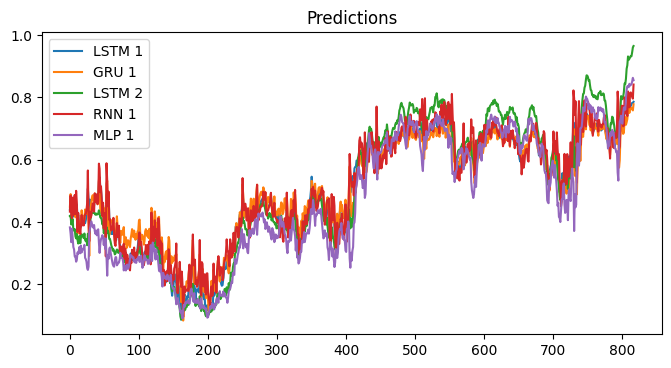

In [ ]:
plt.figure(figsize=(8, 4), dpi=100)
plt.plot(prediction_1, label=models[0])
plt.plot(prediction_2, label=models[1])
plt.plot(prediction_3, label=models[2])
plt.plot(prediction_4, label=models[3])
plt.plot(prediction_5, label=models[4])
plt.legend(loc="upper left")
plt.title('Predictions')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


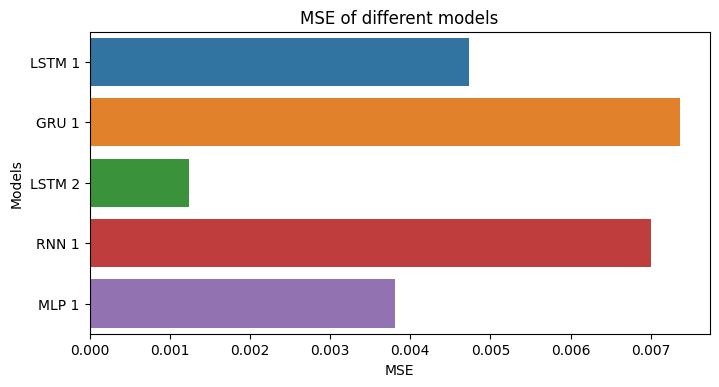

In [ ]:
plt.figure(figsize=(8, 4), dpi=100)
x = models
y = results_mse

sns.barplot(y, x)
plt.ylabel("Models")
plt.xlabel("MSE")

plt.title('MSE of different models')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


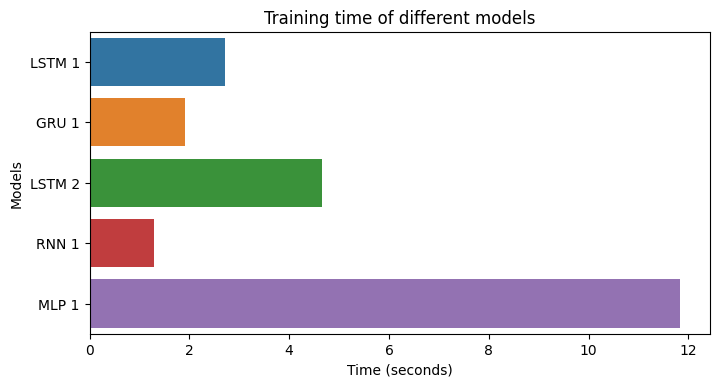

In [ ]:
plt.figure(figsize=(8, 4), dpi=100)
x = models
y = [running_time1, running_time2, running_time3, running_time4, running_time5]

sns.barplot(y, x)
plt.ylabel("Models")
plt.xlabel("Time (seconds)")

plt.title('Training time of different models')
plt.show()